# Name: <span style="color:red">Mohamed Elsherif</span>

# Programming Exercise 1:  Single Compartment Model

In the pen-and-paper exercises, we have already computed the response of a point neuron with passive membrane to an input current. In this programming exercise, we will solve the same neuron numerically. In later exercises, we will build on this model, including more sophisticated elements.

This notebook contains the overall structure of the assignment. Please do not delete or alter pre-written code; you will only need to fill in code in specific cells. Parts that need to be changed to solve the tasks always start and end with ### YOUR CODE HERE ###. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math ### i added this

We are interested in the equivalent circuit that we already considered in the pen-and-paper exercises.
![](rc_circuit_current.png)
In particular, we want to find the response of the membrane potential over time, denoted as $V(\cdot)$, to some input current $I_e(\cdot)$. We will implement the circuit model, and then approximate $V(\cdot)$ numerically.
First, we need to initialize the model's parameters. We set them as
- membrane equilibrium potential: $E_m = 0V$
- length: $L = 100\mu m$
- diameter: $d = 2\mu m$
- specific membrane resistance: $r_m = 1\Omega m^2$
- specific membrance capacitance: $c_m = 10^{-2} F m^{-2}$

### 1.1

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the model parameters.

Remember to only alter code between the ### YOUR CODE HERE ### statements! The parameters needed for the simulation are already implemented
</div>

In [2]:
delta_t, t_start, t_stop = 1e-4, 0., 0.2

### YOUR CODE HERE ###

#Em, L, d, rm, cm = _, _, _, _, _
Em, L, d, rm, cm = 0, 100e-6, 2e-6, 1, 1e-2

### YOUR CODE HERE ###

We have the model parameters given as _specific_ values which are normalized spatially, whereas the input current is not given as a density. Thus, we need to convert our specific parameters to non-speficic ones.

<div class="alert alert-block alert-success">
<b>Task:</b> Complete the function convert_parameters() to convert the specific parameters.

<i>Hint:</i> You only need to convert $r_m$ and $c_m$.
</div>


In [3]:
def convert_parameters(Em, L, d, rm, cm):     
    '''Returns non-speficic paramaters for a given set of specific parameters.
    
    Args:
        Em: Equilibrium potential
        L: Length of the compartment
        d: Diameter of the compartment
        rm: Specific membrane resistance
        cm: Specific membrane capacitance
         
    Returns:
        Em: Equilibrium potential
        L: Length of the compartment
        d: Diameter of the compartment
        Rm: Membrane resistance
        Mm: Membrane capacitance         
    '''
    
    ### YOUR CODE HERE ###
    # Calculate the membrane area
    A = math.pi * d * L
    
    # Convert specific parameters to non-specific parameters
    Rm = rm / A
    Cm = cm * A

    ### YOUR CODE HERE ###
    
    return Em, L, d, Rm, Cm

In [4]:
# Call the function to convert the initial parameters

Em, L, d, Rm, Cm = convert_parameters(Em, L, d, rm, cm)

### 1.2

Having initialized the model parameters, we next need to implement the current input to the circuit. First, we will simulate a step input of the form
$$
I_e(t) = 
\begin{cases}
0, & t < 0 \\
-50pA, & 0 \leq t
\end{cases}.
$$

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the step-function input.

</div>


In [5]:
def step_input(time):    
    '''Implements the time-dependent input current I_e.
    
    Args:
        Time as float
         
    Returns:
        Input current at the given time as float     
    '''
    
    ### YOUR CODE HERE ###
    if time < 0:
        return 0.0
    else:
        return -50e-12  # -50 pA in Amperes

    ### YOUR CODE HERE ###

Now, let's put everything together to simulate the neuron. In the pen-and-paper exercises, we derived the DEQ governing the membrane potential, namely

$$
C_m \frac{\text{d}V}{\text{d}t} = \frac{E_m - V(t)}{R_m} + I_e(t).
$$
To solve this equation, use Euler's backward method to approximate $\frac{\text{d}V}{\text{d}t}$ by
$$
\frac{V(t) - V(t - \Delta t)}{\Delta t}.
$$

<div class="alert alert-block alert-success">
<b>Task:</b> Write a function to simulate the membrane response to the step input by approximating $V(\cdot )$.


</div>

In [6]:
def simulate_step_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm):     
    '''Solves the single-compartment equation using Euler approximation.
    
    Args:
        delta_t: Time step size for Euler
        t_start: Start time of the simulation
        t_stop: End time of the simulation
        Em, L, d, Rm, Cm: As before. Output of convert_parameters() function
         
         
    Returns:
        t: Grid points on which the solution is evaluated
        v: The approximated membrane potential evaluated at the grid points            
    '''
    
    ### YOUR CODE HERE ###
    # Time vector from t_start to t_stop with steps of delta_t
    t = np.arange(t_start, t_stop + delta_t, delta_t)
    
    # Initialize membrane potential array
    v = np.zeros_like(t)
    v[0] = Em  # Starting membrane potential at equilibrium
    
    # Euler's method to approximate V(t)
    for i in range(1, len(t)):
        # Current input at time t[i]
        Ie = step_input(t[i])
        
        # Euler backward method to update membrane potential
        v[i] = v[i - 1] + (delta_t / Cm) * ((Em - v[i - 1]) / Rm + Ie)
    
        
    ### YOUR CODE HERE ###
    
    return t, v

<div class="alert alert-block alert-success">
<b>Task:</b> Test your function for different values of $\Delta t$. In particular, set $\Delta t$ to 0.01, 0.001, 0.0001. What changes in the simulation?

<i>Note:</i> In the following, we will play around with the parameters. In each task, set all parameters not explicitly mentioned to equal the initial parameters we defined earlier.
</div>

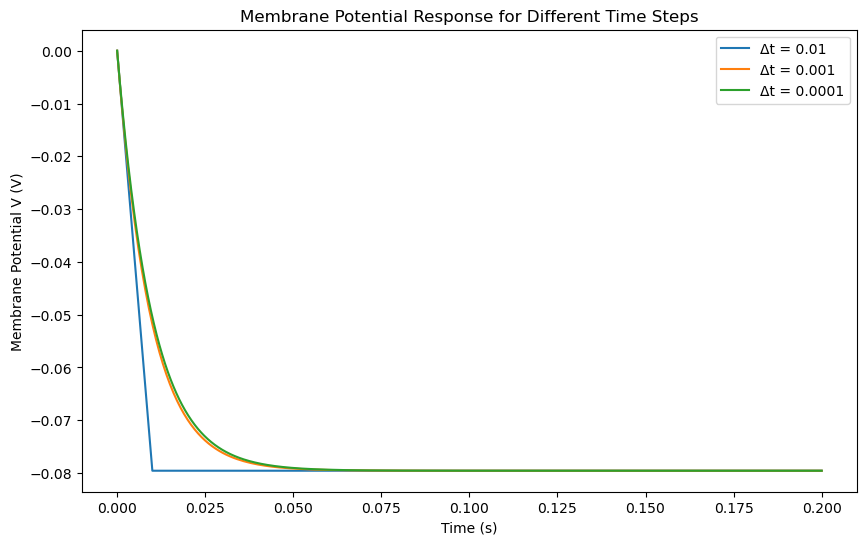

In [7]:
### YOUR CODE HERE ###
# Convert specific parameters to non-specific ones
_, _, _, Rm, Cm = convert_parameters(Em, L, d, rm, cm)

# Time simulation parameters
t_start = 0.0
t_stop = 0.2

# Define different time step values to test
time_steps = [0.01, 0.001, 0.0001]

# Plot the results for different time steps
plt.figure(figsize=(10, 6))

for delta_t in time_steps:
    # Simulate the membrane response for the current delta_t
    t, v = simulate_step_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm)
    
    # Plot the results
    plt.plot(t, v, label=f'Δt = {delta_t}')

plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential V (V)')
plt.title('Membrane Potential Response for Different Time Steps')
plt.legend()
plt.grid(False)
plt.show()

### YOUR CODE HERE

<b> Your Answer: </b>
<div class="alert alert-warning">
    <ul>
        <li>With Δt= 0.01, the time step is relatively large, so the approximation may be coarse.</li>
        <li>With Δt=0.001, which is a smaller time step, allowing for a more accurate approximation of the differential equation.</li>
        <li>With Δt= 0.0001, which is a very small time step providing higher accuracy, closely approximating the true continuous solution.</li>
    </ul>
    This shows that larger time steps can lead to less accurate and possibly unstable simulations, while smaller time steps yield higher accuracy and stability.
</div>

<div class="alert alert-block alert-success">
<b>Task:</b> From now on, set $\Delta t = 0.0001$. Simulate the neuron for $c_m = 0.01 F m^{-2}$ and $c_m = 0.1 F m^{-2}$. What changes, and why?


</div>

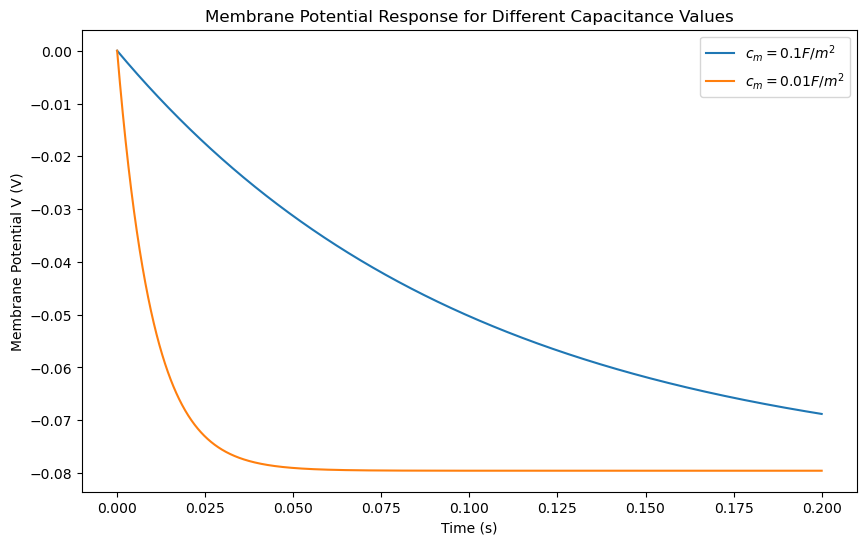

In [8]:
### YOUR CODE HERE ###
# Test for different capacitance values
capacitances = [0.1, 0.01]  # in F/m^2

plt.figure(figsize=(10, 6))

for cm in capacitances:
    # Convert specific parameters to non-specific ones for each cm
    _, _, _, Rm, Cm = convert_parameters(Em, L, d, rm, cm)
    
    # Run the simulation
    t, v = simulate_step_function(0.0001, t_start, t_stop, Em, L, d, Rm, Cm)
    
    # Plot the result
    plt.plot(t, v, label=f'$c_m = {cm} F/m^2$')

plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential V (V)')
plt.title('Membrane Potential Response for Different Capacitance Values')
plt.legend()
plt.grid(False)
plt.show()
### YOUR CODE HERE ###

<b> Your Answer: </b>

<div class="alert alert-warning">
I observe that Lower capacitance results in a faster membrane response, while Higher capacitance results in a slower membrane response. This is because a higher capacitance requires more charge to reach a given potential change, slowing down the voltage response. Lower capacitance allows the potential to respond more rapidly because less charge is needed for the same voltage change.</div>

<div class="alert alert-block alert-success">
<b>Task:</b> Simulate the neuron for $r_m = 1\Omega m^2$ and $r_m = 10 \Omega m^2$. What changes, and why?


</div>

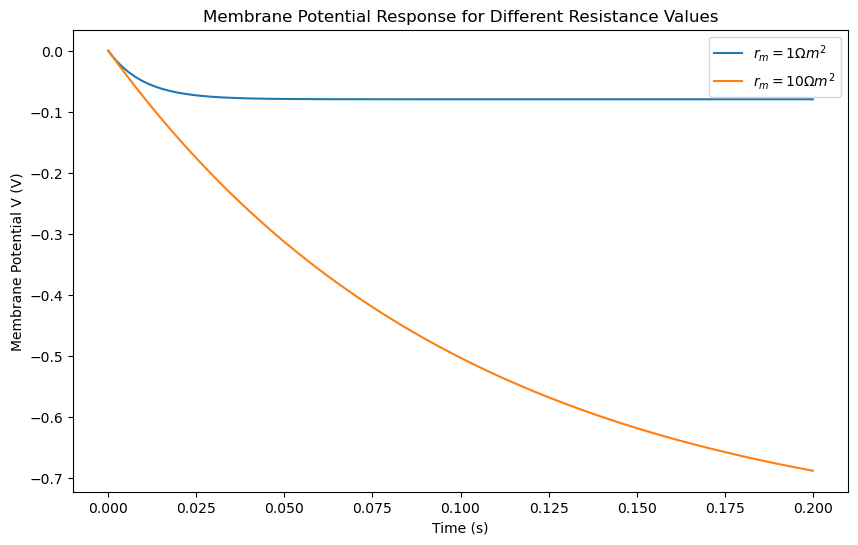

In [9]:
### YOUR CODE HERE ###
# Test for different resistance values
resistances = [1, 10]  # in Ohm*m^2

plt.figure(figsize=(10, 6))

for rm in resistances:
    # Convert specific parameters to non-specific ones for each rm
    _, _, _, Rm, Cm = convert_parameters(Em, L, d, rm, cm)
    
    # Run the simulation
    t, v = simulate_step_function(0.0001, t_start, t_stop, Em, L, d, Rm, Cm)
    
    # Plot the result
    plt.plot(t, v, label=f'$r_m = {rm} Ωm^2$')

plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential V (V)')
plt.title('Membrane Potential Response for Different Resistance Values')
plt.legend()
plt.grid(False)
plt.show()
### YOUR CODE HERE ###

<b> Your Answer: </b>

<div class="alert alert-warning">
The membrane potential response $V(t)$ changes with changed resistance. At low resistance, it reaches its new steady-state value relatively quickly after the step input, while at high resistance, the membrane potential $V(t)$ takes a longer time to reach the steady-state value. This is because the time constant  $ \tau = R_m \cdot C_m = r_m \cdot c_m $ dictates how quickly the membrane potential responds to changes in input current. 
    
- Higher $r_m$: Increases $\tau$, meaning the membrane potential changes more slowly.
- Lower $r_m$: Decreases $\tau$, leading to a faster response of the membrane potential.
</div>

### 1.3

Finally, we will simulate the response to a sinusoidal input current given by
$$
I_e(t) = 100 pA \sin (2 \pi f t),
$$
and run the model for different frequencies.

<div class="alert alert-block alert-success">
<b>Task:</b> Implement the sinusoidal input function.

</div>

In [10]:
def sinusoidal_input(time, frequency):
    '''Implements the time-dependent sinusoidal input current I_e.
    
    Args:
        time: Time as float
        frequency: Frequency parameter f
         
    Returns:
        Sinusoidal input current at the given time as float     
    '''
    
    ### YOUR CODE HERE ###
    # Convert the amplitude from pA to A
    amplitude = 100e-12  # 100 pA in Amperes
    
    # Calculate the sinusoidal input current
    I_e = amplitude * math.sin(2 * math.pi * frequency * time)
    
    return I_e
    ### YOUR CODE HERE ###

<div class="alert alert-block alert-success">
<b>Task:</b> Write a function to simulate the membrane response to the sinusoidal input by approximating $V(\cdot )$.
</div>

In [11]:
def simulate_sinusoidal_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm, frequency):    
    '''Solves the single-compartment equation using Euler approximation.
    
    Args:
        delta_t: Time step size for Euler
        t_start: Start time of the simulation
        t_stop: End time of the simulation
        Em, L, d, Rm, Cm: As before. Output of convert_parameters() function
        frequency: The frequency f of the sinusoidal input
         
         
    Returns:
        t: Grid points on which the solution is evaluated
        v: The approximated membrane potential evaluated at the grid points     
    '''
    
    ### YOUR CODE HERE ###
    # Generate the time vector
    t = np.arange(t_start, t_stop + delta_t, delta_t)
    
    # Initialize membrane potential array with the starting potential equal to Em
    v = np.zeros_like(t)
    v[0] = Em  # Initial membrane potential at equilibrium
    
    # Euler's method to approximate V(t) over time
    for i in range(1, len(t)):
        # Calculate the sinusoidal input current at time t[i]
        Ie = sinusoidal_input(t[i], frequency)
        
        # Update membrane potential using the differential equation
        v[i] = v[i - 1] + (delta_t / Cm) * ((Em - v[i - 1]) / Rm + Ie)
    ### YOUR CODE HERE ###
    
    return t, v

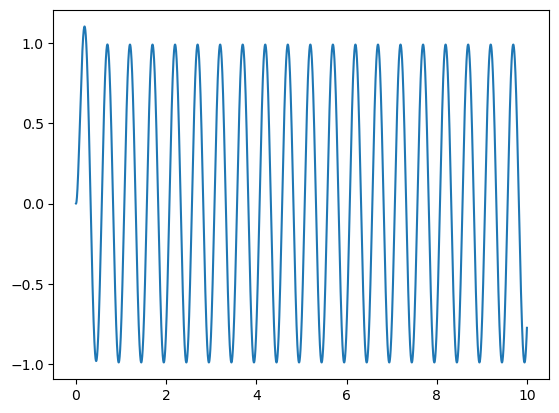

In [12]:
### Feel free to test your function for different values of f (freq)

### YOUR CODE HERE

#freq = _
freq = 2

### YOUR CODE HERE

t, v = simulate_sinusoidal_function(delta_t, t_start, 10, Em, L, d, Rm, Cm, frequency=freq)
plt.plot(t, v)

When the system has converged in your simulation, plot the log of the amplitude of the solution against the log of the input frequency. Use the frequencies
    
- $f_1 = 0.5$Hz
- $f_2 = 1$Hz 
- $f_3 = 2$Hz 
- $f_4 = 8$Hz 
- $f_5 = 100$Hz 
- $f_6 = 1000$Hz 

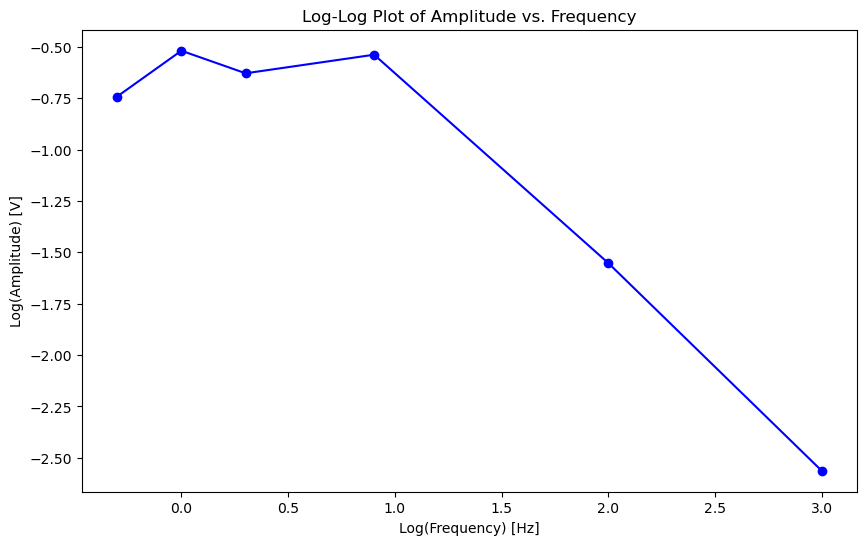

In [13]:
### YOUR CODE HERE ###
# Define the list of frequencies to test
frequencies = [0.5, 1, 2, 8, 100, 1000]  # Hz

# A function to compute the amplitude of the oscillation at a given frequency
def compute_amplitude(v):
    """Calculates the amplitude of the oscillation for the given voltage trace."""
    # Take the last half of the voltage trace to ensure we are looking at steady-state oscillations
    steady_state_v = v[len(v) // 2:]
    amplitude = (np.max(steady_state_v) - np.min(steady_state_v)) / 2
    return amplitude

amplitudes = []

# Loop through each frequency, simulate, and calculate amplitude
for freq in frequencies:
    t, v = simulate_sinusoidal_function(delta_t, t_start, t_stop, Em, L, d, Rm, Cm, frequency=freq)
    amplitude = compute_amplitude(v)
    amplitudes.append(amplitude)

# Plot the log-log plot of frequency vs amplitude
plt.figure(figsize=(10, 6))
plt.plot(np.log10(frequencies), np.log10(amplitudes), marker='o', linestyle='-', color='b')
plt.xlabel('Log(Frequency) [Hz]')
plt.ylabel('Log(Amplitude) [V]')
plt.title('Log-Log Plot of Amplitude vs. Frequency')
plt.grid(False)
plt.show()
### YOUR CODE HERE ###